In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

py.sign_in("parikkap", "vUR2vsPpcmhl5qZQ0NlT")



pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader.data import DataReader

 Read in data

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta(days=5*365)

df_tesla = DataReader('TSLA', 'iex', start, end)
df_tesla1 = DataReader('TSLA', 'iex', start, end)
#df_tesla.reset_index(inplace=True)
df_tesla.index = pd.to_datetime(df_tesla.index, format='%Y-%m-%d')
# Drop row if null
df_tesla.dropna(inplace=True)


5y
5y


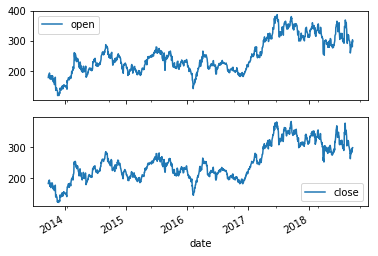

In [3]:

fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

#set ticks every week
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

df_tesla[['open']].plot(ax=ax1)
df_tesla[['close']].plot(ax=ax2)

plt.legend(loc=4)

plt.show()

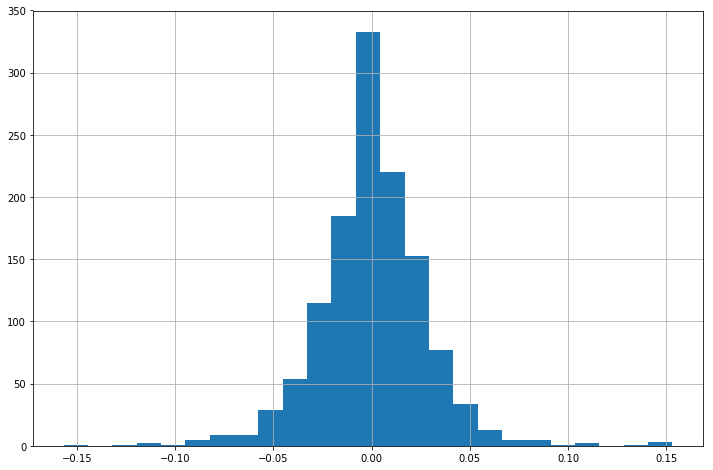

In [4]:
df_tesla['Log_Ret'] = np.log(df_tesla['close'] / df_tesla['close'].shift(1))
df_tesla['Log_Ret'].hist(bins=25, figsize=(12,8))
df_tesla1['Log_Ret'] = np.log(df_tesla['close'] / df_tesla['close'].shift(1))


In [5]:

trace = go.Candlestick(x=df_tesla.index,
                       open=df_tesla.open,
                       high=df_tesla.high,
                       low=df_tesla.low,
                       close=df_tesla.close)

layout = go.Layout(
        xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data = [trace]

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='tesla_candelStick')

In [6]:
#df_tesla['Log_Ret'].describe()

Log feature

In [7]:
df_tesla['Log_Ret'].min()
df_tesla['Log_Ret'].quantile(q=0.25)
df_tesla['Log_Ret'].quantile(q=0.5)
df_tesla['Log_Ret'].quantile(q=0.75)
df_tesla['Log_Ret'].max()

df_tesla['up'] = 0
df_tesla['Bup'] = 0


conditions = [
    df_tesla['Log_Ret'] < df_tesla['Log_Ret'].quantile(.25)
]

choices = [1]

df_tesla['Bdown'] = np.select(conditions, choices, default=0)

conditions = [
    df_tesla['Log_Ret'] < df_tesla['Log_Ret'].quantile(.5)
]

choices = [1]

df_tesla['down'] = np.select(conditions, choices, default=0)

conditions = [
    df_tesla['Log_Ret'] > df_tesla['Log_Ret'].quantile(.75)
]

choices = [1]

df_tesla['up'] = np.select(conditions, choices, default=0)

conditions = [
    df_tesla['Log_Ret'] > df_tesla['Log_Ret'].max()
]

choices = [1]

df_tesla['Bup'] = np.select(conditions, choices, default=0)


In [8]:
df_tesla.dropna(inplace=True)


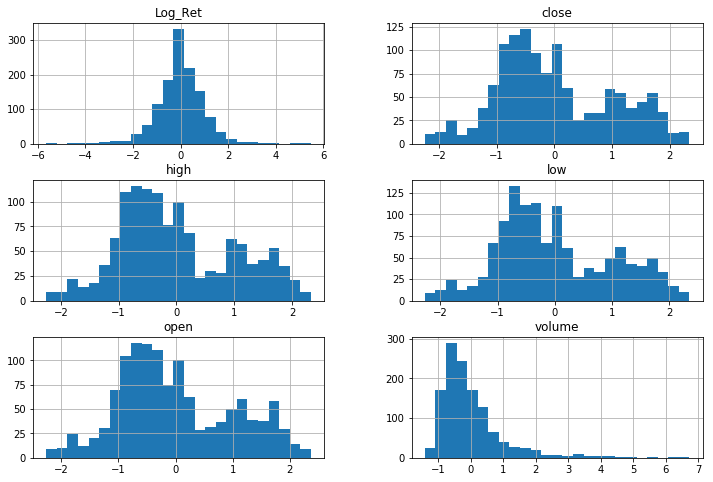

In [9]:
headers = list(df_tesla1.columns.values)
df_copy = pd.DataFrame()
for header in headers:
    df_copy[header] = (df_tesla1[header] - df_tesla1[header].mean()) / (df_tesla1[header].std())
df_copy.hist(bins=25, figsize=(12, 8))
plt.show()

ROC of dataframe

In [10]:
headers = list(df_tesla.columns.values[:4])
new_headers = ['roc_open', 'roc_close', 'roc_low',]

for idx, header in enumerate(headers):
    df_tesla['roc_0' + header] = (df_tesla[header]- df_tesla[header][0]) / df_tesla[header][0] * 100.00


In [11]:
#df_tesla['roc'] = (df_tesla['close']- df_tesla['close'][0]) / df_tesla['close'][0] * 100.00

In [12]:
#trace = go.Candlestick(x=df_tesla.index,
#                       open=df_tesla.roc_open,
#                       high=df_tesla.roc_high,
#                       low=df_tesla.roc_low,
#                       close=df_tesla.roc_close)

#layout = go.Layout(
#        xaxis = dict(
#        rangeslider = dict(
#            visible = False
#        )
#    )
#)

#data = [trace]

#fig = go.Figure(data=data,layout=layout)
#py.iplot(fig, filename='tesla__roc_candelStick')

In [13]:
def ROC(df, tf): 
    headers = list(df.columns.values)
    temp = []
    temp_dict = dict()
    df_roc = pd.DataFrame()
    

    
    for idx, header in enumerate(headers):
        roc = []
        x = tf
        tempList = []
        while x < len(df[header]):
            rocs = (df[header][x] - df[header][x - tf]) / df[header][x - tf] * 100.00
            roc.append('{:.0f}'.format(rocs))
            
            if(df[header][x] > df[header][x - tf]):
                tempList.append('1')
            else:
                tempList.append('0')
        
            x+=1
        temp_dict['roc_' + header + '_' + str(tf)] = roc
        temp_dict['roc_' + header + '_indicator' ] = tempList 
    return pd.DataFrame(temp_dict)


df_roc = ROC(df_tesla[['open', 'high', 'low', 'close']], 30)
df_roc
#frames = [df_tesla, df_roc]

#result = pd.concat(frames, sort=True)
#result

roc_open_30 roc_open_indicator roc_high_30 roc_high_indicator roc_low_30  \
0            -16                  0         -14                  0        -19   
1            -23                  0         -23                  0        -26   
2            -27                  0         -26                  0        -29   
3            -25                  0         -25                  0        -27   
4            -25                  0         -26                  0        -28   
5            -25                  0         -26                  0        -22   
6            -21                  0         -22                  0        -20   
7            -22                  0         -24                  0        -22   
8            -26                  0         -27                  0        -34   
9            -35                  0         -31                  0        -31   
10           -28                  0         -27                  0        -26   
11           -29                  0         -29                  0        -29   
12           -30                  0         -32                  0        -31   
13           -29                  0         -31                  0        -31   
14           -36                  0         -35                  0        -37   
15           -34                  0         -32                  0        -34   
16           -29                  0         -29                  0        -30   
17           -31                  0         -31                  0        -32   
18           -28                  0         -21                  0        -23   
19           -15                  0         -19                  0        -17   
20           -17                  0         -17                  0        -13   
21           -14                  0         -18                  0        -16   
22           -21                  0         -19                  0        -20   
23           -18                  0         -14                  0        -14   
24           -13                  0         -14                  0         -9   
25           -15                  0         -12                  0        -12   
26            -5                  0          -7                  0         -4   
27            -9                  0          -9                  0         -9   
28           -11                  0         -12                  0        -11   
29           -15                  0         -15                  0        -15   
...          ...                ...         ...                ...        ...   
1198           2                  1           1                  1         -0   
1199           2                  1           3                  1          2   
1200          -0                  0          -2                  0          5   
1201           3                  1           4                  1          7   
1202           8                  1           9                  1         13   
1203           6                  1           5                  1          1   
1204          -7                  0          -3                  0         -6   
1205          -4                  0          -1                  0         -3   
1206           2                  1           1                  1         -0   
1207          -1                  0           1                  1          2   
1208           2                  1           1                  1          3   
1209           2                  1           2                  1          1   
1210           3                  1          -2                  0          1   
1211          -5                  0          -4                  0         -4   
1212          -4                  0          -6                  0         -5   
1213          -6                  0          -6                  0         -4   
1214          -2                  0          -2                  0         -2   
1215          -6                  0 

In [14]:
def movingaverage(interval, window_size=10):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [15]:
INCREASING_COLOR = '#00FFFF'
DECREASING_COLOR = '#000000'

In [16]:
data = [ dict(
    type = 'candlestick',
    open = df_tesla.open,
    high = df_tesla.high,
    low = df_tesla.low,
    close = df_tesla.close,
    x = df_tesla.index,
    yaxis = 'y2',
    name = 'GS',
    increasing = dict( line = dict( color = INCREASING_COLOR ) ),
    decreasing = dict( line = dict( color = DECREASING_COLOR ) ),
) ]

layout=dict()

fig = dict( data=data, layout=layout )

In [17]:
fig['layout'] = dict()
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict( rangeselector = dict( visible = True ) )
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )

In [18]:
rangeselector=dict(
    visibe = True,
    x = 0, y = 0.9,
    bgcolor = 'rgba(150, 200, 250, 0.4)',
    font = dict( size = 13 ),
    buttons=list([
        dict(count=1,
             label='reset',
             step='all'),
        dict(count=1,
             label='1yr',
             step='year',
             stepmode='backward'),
        dict(count=3,
            label='3 mo',
            step='month',
            stepmode='backward'),
        dict(count=1,
            label='1 mo',
            step='month',
            stepmode='backward'),
        dict(step='all')
    ]))
    
fig['layout']['xaxis']['rangeselector'] = rangeselector

In [19]:
mv_y = movingaverage(df_tesla.close)
mv_x = list(df_tesla.index)

# Clip the ends
mv_x = mv_x[5:-5]
mv_y = mv_y[5:-5]

fig['data'].append( dict( x=mv_x, y=mv_y, type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#E377C2' ),
                         yaxis = 'y2', name='Moving Average' ) )

In [20]:
colors = []

for i in range(len(df_tesla.close)):
    if i != 0:
        if df_tesla.close[i] > df_tesla.close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)

In [21]:
fig['data'].append( dict( x=df_tesla.index, y=df_tesla.volume,                         
                         marker=dict( color=colors ),
                         type='bar', yaxis='y', name='Volume' ) )

In [24]:
fig['data'].append( dict( x=df_tesla.index, y=df_roc.roc_open_30, type='scatter', yaxis='y2', 
                         line = dict( width = 1 ),
                         marker=dict(color='#ccc'), 
                         legendgroup='roc_30', name='roc_open_30') )

fig['data'].append( dict( x=df_tesla.index, y=df_roc.roc_close_30, type='scatter', yaxis='y2',
                         line = dict( width = 1 ),
                         marker=dict(color='#ccc'),
                         legendgroup='roc_30', showlegend=False ) )

#fig['data'].append( dict( x=df_tesla.index, y=df_roc.roc_open_indicator, type='scatter', yaxis='y2',
#                         line = dict( width = 1 ),
#                         marker=dict(color='#E377C2'),
#                         legendgroup='roc_30_open_indicator', showlegend=True ) )



In [25]:
py.iplot( fig, filename = 'candlestick_roc_plotting', validate = False )


Regession start

In [27]:
df_tesla['Label'] = df_tesla["close"].shift(-1)

In [28]:
df_tesla

open      high       low    close    volume   Log_Ret  up  \
date                                                                        
2013-09-25  183.5600  186.3000  180.5000  185.238   8240127  0.015823   1   
2013-09-26  186.7000  189.6800  185.6110  188.640   6614693  0.018199   1   
2013-09-27  187.5200  191.2800  186.4300  190.900   5915247  0.011909   0   
2013-09-30  189.0000  194.5000  188.0000  193.370   8926637  0.012856   0   
2013-10-01  193.9600  194.2300  188.3700  193.000   7757249 -0.001915   0   
2013-10-02  188.5900  191.8300  175.4000  180.950  20730359 -0.064469   0   
2013-10-03  175.0450  179.6900  168.0000  173.310  23788889 -0.043139   0   
2013-10-04  176.4000  181.1800  172.6500  180.980  14373452  0.043305   1   
2013-10-07  182.4600  186.7300  180.2600  183.070  11467310  0.011482   0   
2013-10-08  184.4000  185.9300  173.2100  174.730  13735604 -0.046627   0   
2013-10-09  174.7300  174.9900  161.5000  168.780  15301616 -0.034646   0   
2013-10-10  173.0900  175.7500  169.6900  172.930   8883910  0.024291   1   
2013-10-11  172.7500  179.2880  171.2000  178.700   8311086  0.032822   1   
2013-10-14  175.0000  182.5000  174.1500  179.720   7769630  0.005692   0   
2013-10-15  185.2800  188.7890  183.1800  183.940  10978536  0.023210   1   
2013-10-16  184.9000  187.3000  182.0900  183.560   8205367 -0.002068   0   
2013-10-17  183.5400  184.8000  180.9900  182.802   6704968 -0.004138   0   
2013-10-18  184.1500  185.9600  182.5200  183.400   5930815  0.003266   0   
2013-10-21  183.2800  183.3900  171.0000  172.600  11532131 -0.060693   0   
2013-10-22  170.5000  177.7800  166.1100  171.540  11394675 -0.006160   0   
2013-10-23  168.9100  171.8100  160.1500  164.500  13327739 -0.041906   0   
2013-10-24  165.0000  174.5000  162.8255  173.150  10825667  0.051248   1   
2013-10-25  174.2100  174.5000  166.8000  169.660   7595458 -0.020362   0   
2013-10-28  170.1800  170.5000  162.2000  162.860   7841727 -0.040905   0   
2013-10-29  162.7600  165.4458  153.0000  164.470  14111737  0.009837   0   
2013-10-30  164.6300  167.6799  158.1700  159.220   8401756 -0.032441   0   
2013-10-31  155.6700  162.4400  153.3000  159.940   9340455  0.004512   0   
2013-11-01  163.0000  165.9000  160.4100  162.170   7180583  0.013846   0   
2013-11-04  165.0000  175.3899  164.2200  175.200  13120374  0.077283   1   
2013-11-05  180.0000  181.4300  171.3601  176.810  22467101  0.009148   0   
...              ...       ...       ...      ...       ...       ...  ..   
2018-08-10  354.0000  360.0000  346.0000  355.490  11552044  0.008588   0   
2018-08-13  361.1300  363.1900  349.0200  356.410  10463881  0.002585   0   
2018-08-14  358.4500  359.1995  347.1000  347.640   6986427 -0.024914   0   
2018-08-15  341.9059  344.4900  332.1400  338.690   9101258 -0.026082   0   
2018-08-16  339.9100  342.2800  333.8200  335.450   6064033 -0.009612   0   
2018-08-17  323.5000  326.7700  303.5300  305.500  18958612 -0.093523   0   
2018-08-20  291.7035  308.5000  288.2000  308.440  17402335  0.009578   0   
2018-08-21  310.6100  324.7900  309.0000  321.900  13172230  0.042714   1   
2018-08-22  320.8700  323.8800  314.6700  321.640   5945955 -0.000808   0   
2018-08-23  319.1400  327.3200  318.1000  320.100   5147286 -0.004799   0   
2018-08-24  320.7000  323.8500  319.4000  322.820   3602564  0.008461   0   
2018-08-27  318.0000  322.4350  308.8100  319.270  13079288 -0.011058   0   
2018-08-28  318.4100  318.8800  311.1900  311.860   7649091 -0.023483   0   
2018-08-29  310.2700  311.8500  303.6900  305.010   7447392 -0.022210   0   
2018-08-30  302.2600  304.6000  297.7200  303.150   7216706 -0.006117   0   
2018-08-31  302.0000  305.3082  298.6000  301.660   5375104 -0.004927   0   
2018-09-04  296.9400  298.1900  288.0000  288.950   8350469 -0.043047   0   
2018-09-05  285.0500  286.7800  277.1800  280.740   7720821 -0.028825   0   
2018-09-06  284.8000  291.1700  278.8800  280.950   7480760  0.000748   0   
2018-09-07  